In [3]:

import pandas as pd
import matplotlib.pyplot as plt

In [5]:

file_path = '/content/ECOMM DATA.xlsx'
df = pd.read_excel(file_path)


In [6]:
print(df.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [7]:
total_sales = df['Sales'].sum()

In [8]:
print(f'Total Sales: {total_sales}')

Total Sales: 12642501.909880001


In [10]:
df.rename(columns={'Order Date': 'Date'}, inplace=True)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.set_index('Date', inplace=True)

In [13]:
weekly_sales = df['Sales'].resample('W').sum()

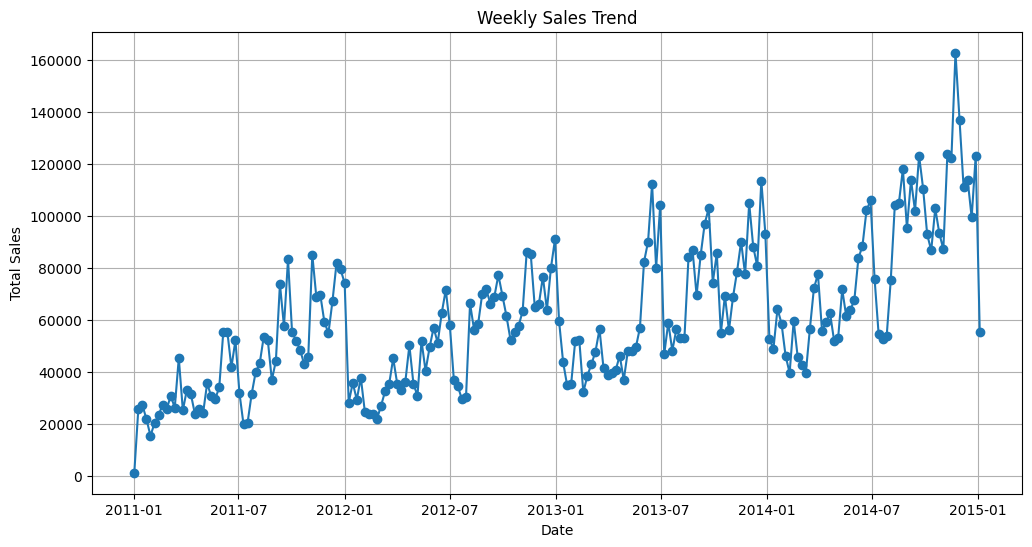

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [15]:
monthly_sales = df['Sales'].resample('M').sum()

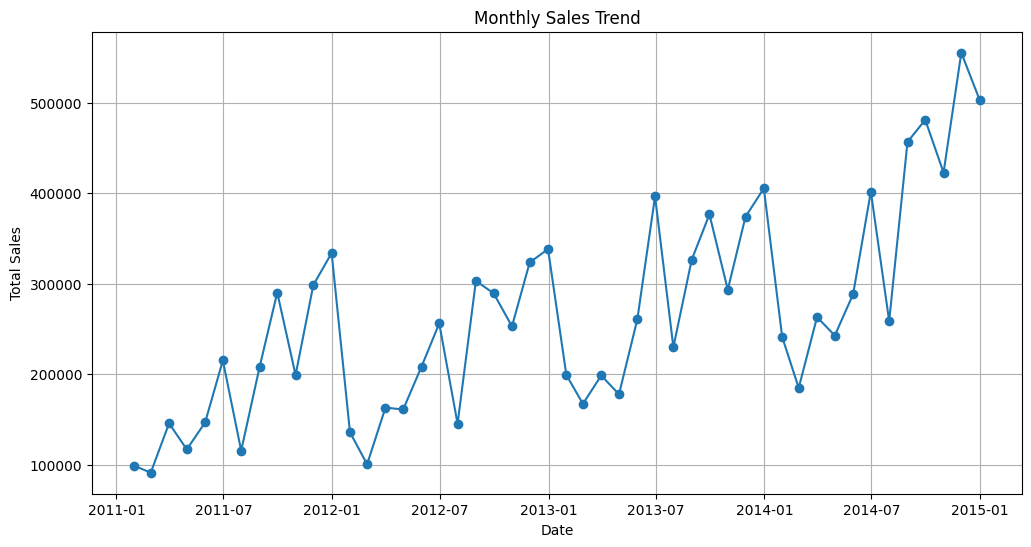

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [17]:
yearly_sales = df['Sales'].resample('Y').sum()

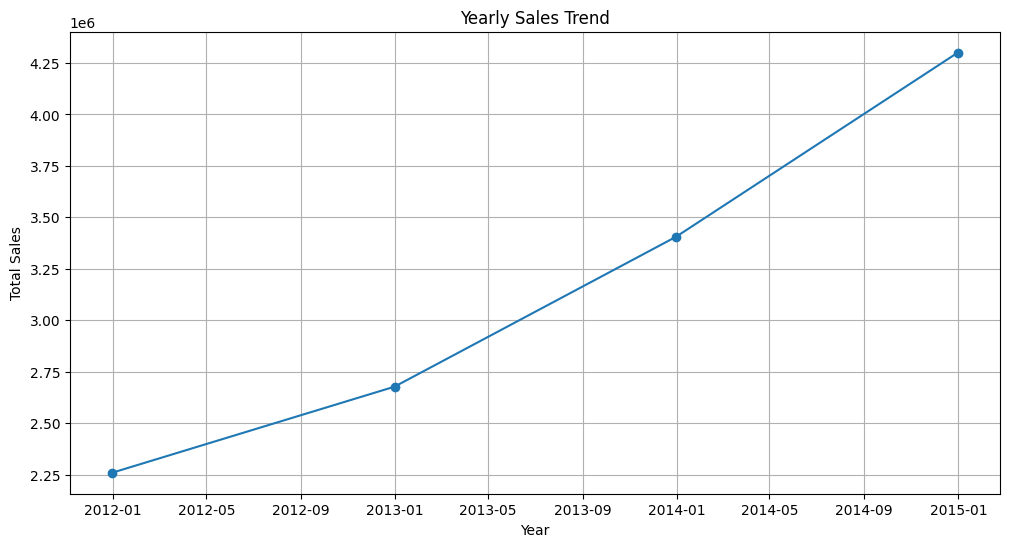

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

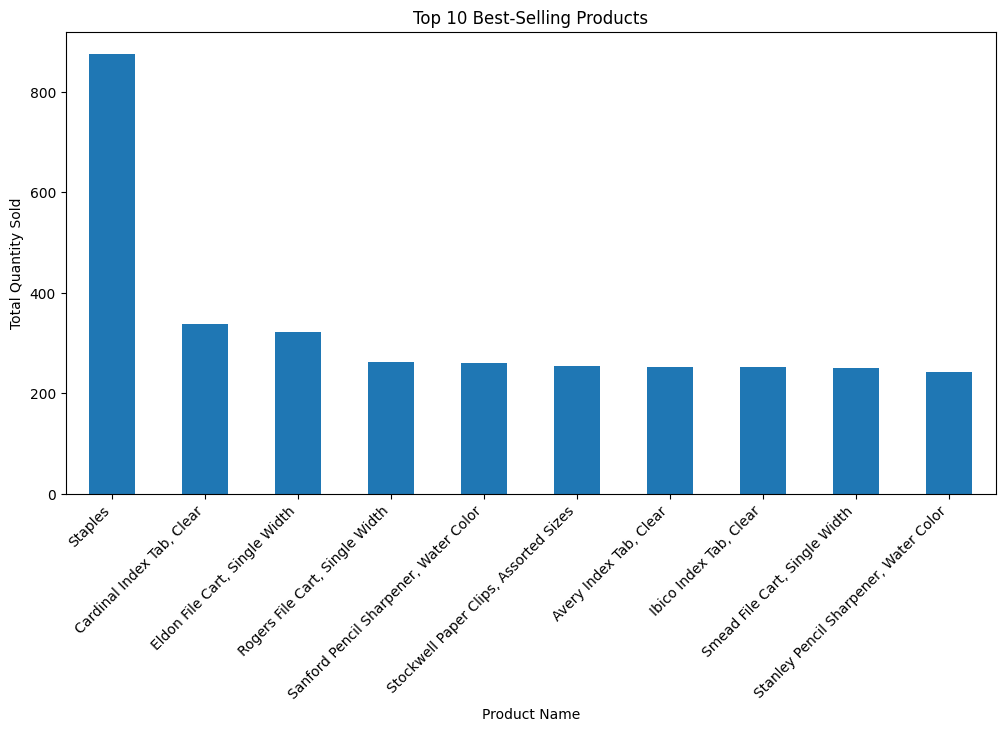

In [19]:

product_sales = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
top_n = 10
product_sales.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()